In [68]:
import os
import numpy as np
import pandas as pd
import mne
from mne.minimum_norm import apply_inverse
import matplotlib.pyplot as plt

# Load file

In [2]:
filepath = '../dataset/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf'
# filepath = '../dataset/edf/train/02_tcp_le/003/00000302/s001_2003_09_24/00000302_s001_t000.edf'
# filepath = '../dataset/edf/train/03_tcp_ar_a/000/00000006/s004_2007_02_02/00000006_s004_t000.edf'

In [3]:
raw = mne.io.read_raw_edf(filepath)
raw.load_data()

Extracting EDF parameters from /media/windows/Users/Remy/OneDrive/Documents/Polycoco/dataset/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...


<RawEDF | 00000077_s003_t000.edf, 36 x 301250 (1205.0 s), ~82.8 MB, data loaded>

In [4]:
len(raw.ch_names)

36

In [5]:
raw.ch_names

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

# Visualize montage

### Read coordinates

In [13]:
df_coord = pd.read_csv('../dataset/_DOCS/montage_coordinates', sep=' ', header=None)
df_coord.columns = ['X','Y','Z']
df_names = pd.read_csv('../dataset/_DOCS/montage_names', sep=' ', header=None)
df_names.columns = ['ch_id']
ch_names = []
for i, id in enumerate(df_names['ch_id'],1):
    for name in raw.ch_names:
        if ' '+id in name:
            ch_names.append(name)
            break
df_names['ch_name'] = ch_names
df = pd.concat([df_names, df_coord], axis=1)

### Plot

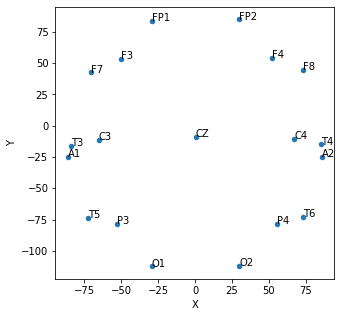

In [14]:
df.plot('X','Y',kind='scatter',figsize=(5,5))
for i, ch_name in enumerate(df['ch_id']):
    plt.text(df['X'][i], df['Y'][i], ch_name)

### Export

In [15]:
df.to_csv('montage_coordinates.csv', sep=';',index=False)

# Set montage on MNE object

In [16]:
df = pd.read_csv('montage_coordinates.csv', sep=';')

In [17]:
df

,ch_id,ch_name,X,Y,Z
0,FP1,EEG FP1-REF,-29.4367,83.9171,-6.990
1,FP2,EEG FP2-REF,29.8723,84.8959,-7.080
2,F7,EEG F7-REF,-70.2629,42.4743,-11.420
3,F3,EEG F3-REF,-50.2438,53.1112,42.192
4,F4,EEG F4-REF,51.8362,54.3048,40.814
5,F8,EEG F8-REF,73.0431,44.4217,-12.000
6,C3,EEG C3-REF,-65.3581,-11.6317,64.358
7,CZ,EEG CZ-REF,0.4009,-9.1670,100.244
8,C4,EEG C4-REF,67.1179,-10.9003,63.580
9,P3,EEG P3-REF,-53.0073,-78.7878,55.940


In [45]:
d={'a':1}
d.update({'b':13})

In [56]:
coord_montage1 = [df[['X', 'Y', 'Z']].values[i] for i in range(len(df))]
coord_montage2 = coord_montage1[:]
coord_montage3 = coord_montage1[:-2]
ch_pos = {name:coord_montage1[i] for i, name in enumerate(list(df['ch_name']))}
ch_pos.update({name:np.array([-1,-1,-i]) for i,name in enumerate(raw.ch_names) if name not in ch_pos.keys()})

In [57]:
dig_montage = mne.channels.make_dig_montage(ch_pos=ch_pos)
raw.set_montage(dig_montage)

<ipython-input-57-92f5b67650f1>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(dig_montage)


<RawEDF | 00000077_s003_t000.edf, 36 x 301250 (1205.0 s), ~82.8 MB, data loaded>

# Visualize with MNE functions

Creating RawArray with float64 data, n_channels=36, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<ipython-input-63-4cb5cd050880>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  dig_montage.plot();


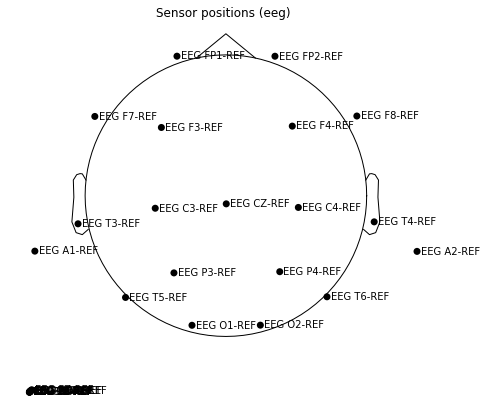

In [63]:
dig_montage.plot();

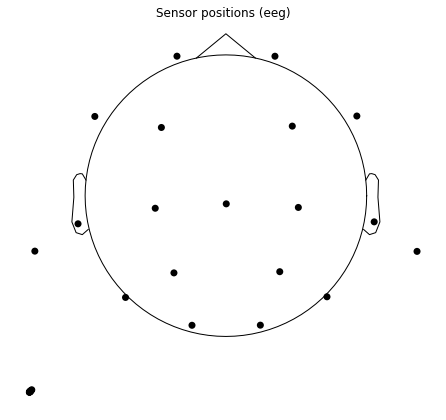

In [64]:
raw.plot_sensors(ch_type='eeg');

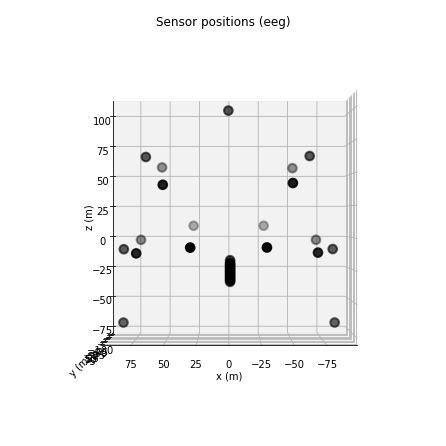

In [66]:
raw.plot_sensors(ch_type='eeg', kind='3d');

____

__________